In [88]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [89]:
df=pd.read_csv("Surgical-deepnet.csv")
df

,bmi,Age,asa_status,baseline_cancer,baseline_charlson,baseline_cvd,baseline_dementia,baseline_diabetes,baseline_digestive,baseline_osteoart,...,complication_rsi,dow,gender,hour,month,moonphase,mort30,mortality_rsi,race,complication
0,19.31,59.2,1,1,0,0,0,0,0,0,...,-0.57,3,0,7.63,6,1,0,-0.43,1,0
1,18.73,59.1,0,0,0,0,0,0,0,0,...,0.21,0,0,12.93,0,1,0,-0.41,1,0
2,21.85,59.0,0,0,0,0,0,0,0,0,...,0.00,2,0,7.68,5,3,0,0.08,1,0
3,18.49,59.0,1,0,1,0,0,1,1,0,...,-0.65,2,1,7.58,4,3,0,-0.32,1,0
4,19.70,59.0,1,0,0,0,0,0,0,0,...,0.00,0,0,7.88,11,0,0,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14630,18.79,14.1,1,0,1,0,0,0,0,0,...,-0.54,1,0,7.78,0,1,0,-0.16,1,1
14631,19.65,12.6,0,0,0,0,0,0,0,0,...,-1.42,4,0,8.40,6,1,0,-0.77,1,1
14632,14.84,12.6,1,0,0,0,0,0,0,0,...,0.65,0,0,13.25,3,3,0,0.99,1,1
14633,17.75,8.9,0,0,1,0,0,0,1,0,...,-0.50,0,1,8.30,5,0,0,0.17,1,1


In [90]:
X=df.drop("complication",axis=1).copy().values
Y=df["complication"].copy().values.reshape(-1,1)

In [91]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)
Y_train.shape

(11708, 1)

In [92]:
class Perceptron:
    def __init__(self,learning_rate, input_length,activation_function="sigmoid"):
        self.learning_rate=learning_rate
        self.weights=np.random.rand(input_length)
        self.bias=np.random.rand(1)
        self.activation_function=activation_function

    def activation(self, x):
        if self.activation_function == 'sigmoid':
            return 1/(1+np.exp(-x))
        elif self.activation_function == 'relu':
            return np.maximum(0,x)
        elif self.activation_function == 'tanh':
            return np.tanh(x)
        elif self.activation_function == 'linear':
            return x
        else:
            raise Exception('Unkown activayion function')

    def fit(self,X_train,Y_train,X_test,Y_test,epochs):
        train_losses=[]
        train_accs=[]
        test_losses=[]
        test_accs=[]
        for epoch in tqdm(range(epochs)):
            for x,y in zip(X_train,Y_train):
                # forwarding
                y_pred = x @ self.weights + self.bias
                y_pred = self.activation(y_pred)

                # back propagation
                error=y - y_pred

                # updating
                self.weights += self.learning_rate*error*x
                self.bias += self.learning_rate*error

            train_loss,train_acc=self.evaluate(X_train,Y_train)
            test_loss,test_acc=self.evaluate(X_test,Y_test)
            train_losses.append(train_loss)
            train_accs.append(train_acc)
            test_losses.append(test_loss)
            test_accs.append(test_acc)
        return train_losses,train_accs,test_losses,test_accs


    def predict(self,X_test):
        Y_perd=[]
        for x_test in X_test:
            y_pred= x_test @ self.weights + self.bias
            y_pred= self.activation(y_pred)
            Y_perd.append(y_pred)
        return np.array(Y_perd)

    def calculate_loss(self,X_test,Y_test,metric):
        Y_pred = self.predict(X_test)
        if metric == 'mse':
            return np.mean(np.square(Y_test-Y_pred))
        elif metric == 'mae':
            return np.mean(np.abs(Y_test-Y_pred))
        elif metric == 'rmse':
            return np.sqrt(np.mean(np.square(Y_test-Y_pred)))
        else:
            raise Exception('Unknown metric')
        
    def calculate_accuracy(self,X_test,Y_test):
        Y_pred=self.predict(X_test)
        Y_pred=np.where(Y_pred > 0.5, 1, 0)
        accuracy=np.sum(Y_pred==Y_test)/len(Y_pred)
        return accuracy

    def evaluate(self,X_test,Y_test):
        loss = self.calculate_loss(X_test,Y_test,'mse')
        accuracy = self.calculate_accuracy(X_test,Y_test)
        return loss,accuracy

In [93]:
model=Perceptron(learning_rate=0.0001,input_length=X_train.shape[1])
train_losses,train_accs,test_losses,test_accs=model.fit(X_train,Y_train,X_test,Y_test,epochs=256)

100%|██████████| 256/256 [02:30<00:00,  1.71it/s]


In [94]:
print('loss, accuracy= ')
model.evaluate(X_test,Y_test)

loss, accuracy= 


(0.154360791757751, 0.7840792620430475)

In [95]:
Y_pred=model.predict(X_test)
Y_pred=np.where(Y_pred > 0.5, 1, 0)

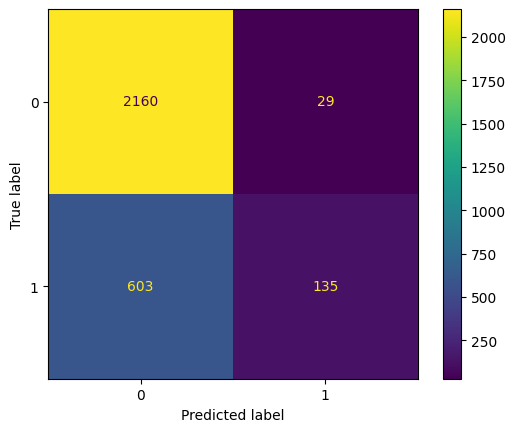

In [96]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

confusion_matrix = confusion_matrix(Y_test,Y_pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["0", "1"])

cm_display.plot()
plt.show() 

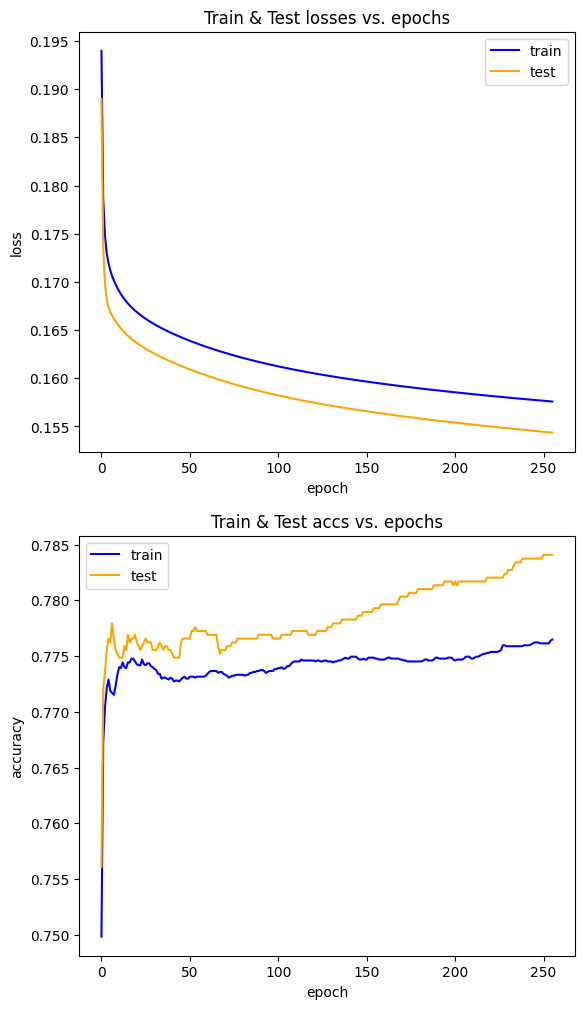

In [97]:
fig,(ax1,ax2)=plt.subplots(2,1)
fig.set_figheight(12)

ax1.plot(train_losses,c="blue")
ax1.plot(test_losses,c="orange")
ax1.set_title("Train & Test losses vs. epochs")
ax1.set_xlabel("epoch")
ax1.set_ylabel("loss")
ax1.legend(['train','test'])

ax2.plot(train_accs,c="blue")
ax2.plot(test_accs,c="orange")
ax2.set_title("Train & Test accs vs. epochs")
ax2.set_xlabel("epoch")
ax2.set_ylabel("accuracy")
ax2.legend(['train','test'])

100%|██████████| 256/256 [01:23<00:00,  3.05it/s]


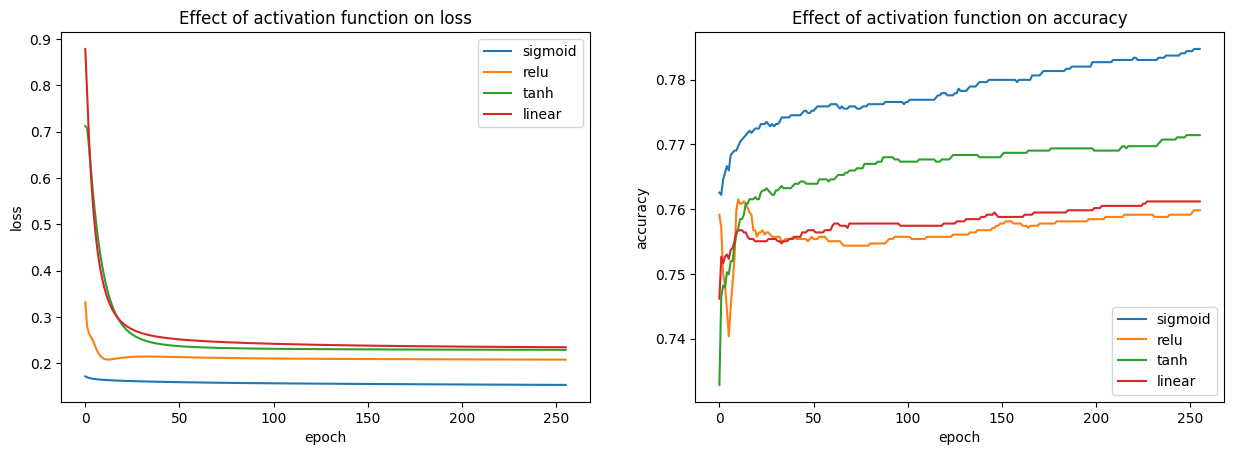

In [98]:
fig,(ax1,ax2)=plt.subplots(1,2)
fig.set_figwidth(15)
for function in ["sigmoid","relu","tanh","linear"]:
    model=Perceptron(learning_rate=0.0001,input_length=X_train.shape[1],activation_function=function)
    train_losses,train_accs,test_losses,test_accs=model.fit(X_train,Y_train,X_test,Y_test,epochs=256)

    ax1.plot(test_losses,label=function)
    ax2.plot(test_accs,label=function)

ax1.set_title("Effect of activation function on loss")
ax1.set_xlabel("epoch")
ax1.set_ylabel("loss")
ax1.legend()

ax2.set_title("Effect of activation function on accuracy")
ax2.set_xlabel("epoch")
ax2.set_ylabel("accuracy")
ax2.legend()